#  <center>TensorFlow2.x模型标准化编译</center> 

## 目录
    一、tf.keras高阶API概览
    二、卷积网络相关层
    三、使用tf.keras构建模型
        1、Sequential model，序贯式模型
        2.Functional model，函数式模型
    四、模型的标准化编译
        1、模型编译——model.compile
        2、模型训练——model.fit
        3、模型评估——model.evaluate
    五、鸢尾花分类实例
        1、准备数据
        2、数据处理
        3、完整代码

## 概述
在TensorFlow2.x中，最大的改变就是对TensorFlow1.x中的大量高阶API进行了删减和合并，使用Keras这个唯一推荐的高阶API，替代原有的一些功能。“不重复造轮子”，这也是TensorFlow2.x引入Keras的最主要的目的。所以接下来，我们将会讲解TensorFlow中最核心的模型搭建这步。这里将使用Keras进行我们接下来的模型搭建。

下面，我们来介绍tf.keras中的一些高阶API，本实验中，可以只看标红部分，其余后续实验中，可能会使用，本节课可作为拓展知识。
## 一、tf.keras高阶API概览
在TensorFlow 2.0版本中完全移除了tf.contrib这个高阶API库，官方推荐的高阶API只有tf.keras。Keras是一个意在降低机器学习编程入门门槛的项目，其在业界拥有众多的拥护者和使用者。经过Keras社区的多年发展，Keras集成了很多符合工业和研究需求的高阶API，使用这些API只需要几行代码就可以构建和运行一个非常复杂的神经网络。TensorFlow官方社区首次宣布发布TensorFlow 2.0版本计划时就明确了Keras会深度融合到TensorFlow中，并且作为官方支持的高阶API。下面我们看看官方文档中提到的tf.keras下的接口模块。
- <font color=red>**activations：**</font> tf.keras.actibations中包含了当前主流的激活函数，可以直接通过该API进行激活函数的调用。
- **applications：** tf.keras.applications中包含的是已经进行预训练的神经网络模型，可以直接进行预测或者迁移学习。目前该模块中包含了主流的神经网络结构。
- **backend：** tf.keras.backend中包含了Keras后台的一些基础API接口，用于实现高阶API或者自己构建神经网络。
- **datasets：** tf.keras.datasets中包含了常用的公开数据训练集，可以直接进行使用（需要翻 墙），数据集有CIFAR-100、Boston Housing等。
- <font color=red>**layers：**</font> tf.keras.layers中包含了已经定义好的常用的神经网络层。
- <font color=red>**losses：**</font> tf.keras.losses中包含了常用的损失函数，可以根据实际需求直接进行调用。
- <font color=red>**optimizers：**</font> tf.keras.optimizers中包含了主流的优化器，可以直接调用API使用。比如Adm等优化器可以直接调用，然后配置所需要的参数即可。
- **preprocessing：** tf.keras.preprocessing中包含了数据处理的一些方法，分为图片数据处理、语言序列处理、文本数据处理等，比如NLP常用的pad_sequences等，在神经网络模型训练前的数据处理上提供了非常强大的功能。
- **regularizers：** tf.keras.regularizers中提供了常用的正则化方法，包括L1、L2等正则化方法。
- **wrappers：** tf.keras.wrappers是一个Keras模型的包装器，当需要进行跨框架迁移时，可以使用该API接口提供与其他框架的兼容性。
- <font color=red>**Sequential类：** </font>tf.keras.Sequential可以让我们将神经网络层进行线性组合形成神经网络结构。

### 二、卷积网络相关层
- <font color=red>**tf.keras.layers.Dense()：**</font> 全连接层
- **tf.keras.layers.Conv1D()：** 普通一维卷积，常用于文本。参数个数 = 输入通道数×卷积核尺寸(如3)×卷积核个数
- <font color=red>**tf.keras.layers.Conv2D()：**</font> 普通二维卷积，常用于图像。参数个数 = 输入通道数×卷积核尺寸(如3乘3)×卷积核个数
- **tf.keras.layers.Conv3D()：** 普通三维卷积，常用于视频。参数个数 = 输入通道数×卷积核尺寸(如3乘3乘3)×卷积核个数
- **tf.keras.layers.SeparableConv2D()：** 二维深度可分离卷积层。不同于普通卷积同时对区域和通道操作，深度可分离卷积先操作区域，再操作通道。即先对每个通道做独立卷即先操作区域，再用1乘1卷积跨通道组合即再操作通道。参数个数 = 输入通道数×卷积核尺寸 + 输入通道数×1×1×输出通道数。深度可分离卷积的参数数量一般远小于普通卷积，效果一般也更好。
- **tf.keras.layers.DepthwiseConv2D()：** 二维深度卷积层。仅有SeparableConv2D前半部分操作，即只操作区域，不操作通道，一般输出通道数和输入通道数相同，但也可以通过设置depth_multiplier让输出通道为输入通道的若干倍数。输出通道数 = 输入通道数 × depth_multiplier。参数个数 = 输入通道数×卷积核尺寸× depth_multiplier。
- **tf.keras.layers.Conv2DTranspose()：** 二维卷积转置层，俗称反卷积层。并非卷积的逆操作，但在卷积核相同的情况下，当其输入尺寸是卷积操作输出尺寸的情况下，卷积转置的输出尺寸恰好是卷积操作的输入尺寸。
- **tf.keras.layers.LocallyConnected2D():**  二维局部连接层。类似Conv2D，唯一的差别是没有空间上的权值共享，所以其参数个数远高于二维卷积。
- <font color=red>**tf.keras.layers.MaxPooling2D():**</font>  二维最大池化层。也称作下采样层。池化层无参数，主要作用是降维。
- **tf.keras.layers.AveragePooling2D()：**  二维平均池化层。
- **tf.keras.layers.GlobalMaxPool2D():** 全局最大池化层。每个通道仅保留一个值。一般从卷积层过渡到全连接层时使用，是Flatten的替代方案。
- **tf.keras.layers.GlobalAvgPool2D():**  全局平均池化层。每个通道仅保留一个值。

## 三、使用tf.keras构建模型
首先，Keras中的模型搭建主要分为两种：**序贯式（Sequential）** 和**函数式（Functional）**

- **<font color=red>序贯式（Sequential）</font>：** 常用于简单的模型的构建，是多个网络层的线性堆叠。
- **<font color=red>函数式（Functional）</font>：** 常用于复杂的模型的构建，可以使用其构建任意形式的神经网络。
### 1、Sequential model，序贯式模型
### 1.1  Sequential model经典形式
在Keras中，提供一种非常简单的模型搭建方式——序贯式模型。序贯模型是函数式模型的简略版，为最简单的线性、从头到尾的结构顺序，不分叉，是多个网络层的线性堆叠。
#### 代码1-1-1：Sequential model的经典形式一
我们用一个例程来演示一个经典的感知机模型。这里<font color=red>**先创建一个Sequential模型**</font>，之后根据需要<font color=red>**依次**</font>向其中<font color=red>**添加**</font>不同的全连接<font color=red>**层**</font>。具体搭建方式如下：
```python
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256,activation='relu',input_dim=784))  #创建一个全连接层，神经元个数为256，输入为784，激活函数为relu
model.add(tf.keras.layers.Dense(128,activation='relu'))  # 继续创建一个全连接层，神经元个数为128，激活函数为relu
model.add(tf.keras.layers.Dense(10,activation='softmax'))  # 最后加上一个softmax层，输出10个类别的概率  
```
#### 代码1-1-2：Sequential model的经典形式二
我们还可以通过将<font color=red>**层的列表传递给Sequential的构造函数**</font>，来创建一个Sequential模型
```python
# 在定义时，直接将层放在列表中传入构造函数（激活层可以单独写，这种方式使用的较少）
model = tf.keras.models.Sequential([tf.keras.layers.Dense(256,input_shape=(784,)),
                                   tf.keras.layers.Activation('relu'),
                                   tf.keras.layers.Dense(128),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Activation('softmax')
                                   ])
```
或将激活层合并到具体的层中：
```python
#激活层也可以体现在具体的层中（这种形式使用的更多）
model = tf.keras.models.Sequential([tf.keras.layers.Dense(256,input_shape=(784,),activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax'),
                                   ])
```
或者，更清晰的分开写：
```python
#1、定义layer层
input_layer = tf.keras.layers.Input(shape = (784,))
hid1_layer = tf.layers.Dense(256,activation='relu')
hid2_layer = tf.keras.layers.Dense(128,activation='relu'),
output_layers = tf.keras.layers.Dense(10,activation='softmax')
#2、将层的列表传给Sequential的构造函数
model = tf.keras.Sequential(layers = [input_layer,hid1_layer,hid2_layer,output_layers])
```


### 1.2 配置对应的层

在 tf.keras.layers 中有很多层，下面是一些通用的构造函数的参数,我们可以在创建这些层的时候，使用以下的构造函数对创建的层进行相关的配置。

- activation：设置层的激活函数。 此参数由内置函数的名称或可调用对象指定。 默认情况下，不应用任何激活。
- kernel_initializer 和 bias_initializer：设置层创建时，权重和偏差的初始化方法。指定方法：名称 或 可调用对象。默认为"Glorot uniform" initializer。
- kernel_regularizer 和 bias_regularizer：设置层的权重、偏差的正则化方法。比如：L1 或 L2 正则。默认为空。
以下实例化tf.keras。 layers.Dense图层使用构造函数参数：
#### 代码1-2-1：<font color=red>配置激活函数<font>的不同方式
```python
tf.keras.layers.Dense(64, activation='sigmoid')  # 创建一个sigmoid层:
tf.keras.layers.Dense(64, activation=tf.sigmoid)  # 或者换种写法
```
#### 代码1-2-2：使用不同的正则化方法
```python
tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01))  #L1正则化,参数为0.01
tf.keras.layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01))  #L2正则化,参数为0.01
```
#### 代码1-2-3：使用不同的初始化方法
```python
tf.keras.layers.Dense(64, kernel_initializer='orthogonal')  #使用随机正交矩阵进行参数的初始化
tf.keras.layers.Dense(64, bias_initializer=tf.keras.initializers.constant(2.0))  #使用常量2.0进行初始化
```

### 2.Functional model，函数式模型
tf.keras.Sequential 模型只适用于多层简单堆叠网络，不能表示复杂模型。使用 Keras functional API 可以构建有复杂拓扑结构的模型。比如：

- 多输入模型（Multi-input models）
- 多输出模型（Multi-output models）
- 有共享层的模型（Models with shared layers (the same layer called several times))
- 具有非顺序数据流的模型（Models with non-sequential data flows (e.g. residual connections))
### 2.1 Functional model经典形式
函数式模型的编程形式类似于传统的编程。
#### 代码2-1-1：经典函数式编程形式一
```python
#创建一个模型，包含一个输入层和三个全连接层
inputs = tf.keras.layers.Input(shape=(4))
x = tf.keras.layers.Dense(32,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(3,activation='softmax')(x)
model = tf.keras.Model(inputs = inputs,outputs = outputs)
```
或者，可以选定义各layers，再将层与层之间串联起来
#### 代码2-2-2：经典函数式编程形式二

```python
#1、定义layers层
input_layer = tf.keras.Input(shape=(4))   # 4是Iris的特征维数（4个特征：可以参考sklearn中关于iris数据集的特征说明）
hide1_layer = tf.keras.layers.Dense(units=32, activation='relu')
hide2_layer = tf.keras.layers.Dense(units=64, activation='relu')
output_layer = tf.keras.layers.Dense(units=3, activation='softmax')

#2、构建Layer之间的函数链式关系
hide1_layer_tensor = hide1_layer(input_layer)      # <--使用Layer的可调用特性
hide2_layer_tensor = hide2_layer(hide1_layer_tensor)
output_layer_tensor = output_layer(hide2_layer_tensor
                                   
# 3. 使用inputs与outputs建立函数链式模型；
model = keras.Model(inputs=input_layer, outputs=output_layer_tensor)
```

## 四、模型的标准化编译

## 1、 编译模型——model.compile
当模型建立完成后，通过 tf.keras.Model 的 compile 方法配置训练过程：
#### 主要参数：
```python
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)
```
#### 参数说明：
tf.keras.Model.compile 接受 3 个重要的参数：
- **oplimizer**：优化器，可从 tf.keras.optimizers 中选择；
- **loss** ：损失函数，可从 tf.keras.losses 中选择；
- **metrics** ：评估指标，可从 tf.keras.metrics 中选择。

## 2、训练模型——model.fit
模型编译完成之后，就可以使用模型进行训练了。模型训练，我们通过调用模型的fit()函数来实现。训练的过程中，必须制定epoch参数进行模型训练，还需要设置在执行训练时，每次使用的训练数据的个数（也就是batch size）。
#### 主要参数
 ```python
model.fit(data_loader.train_data, data_loader.train_label, epochs=num_epochs, batch_size=batch_size)

```
#### 参数解释：
tf.keras.Model.fit 接受 5 个重要的参数：

- **x** ：训练数据；
- **y** ：目标数据（数据标签）；
- **epochs** ：将训练数据迭代多少遍；
- **batch_size** ：批次的大小；
- **validation_data** ：验证数据，可用于在训练过程中监控模型的性能

## 3、评估模型——model.evaluate
训练完成后要使用测试数据来测试模型的准确度，evaluate()函数将对所有输入和输出对预测，并且收集分数，包括损失还有其他指标。提供测试数据及标签即可
#### 函数参数：
```python
model.evaluate(data_loader.test_data, data_loader.test_label)
```
另外，返回了多少个值，是不固定的，如果在complie的时候没有指定metrics的话，默认只有loss一个返回值。可以使用model.metrics_names查看

#### 示例：
```python
model.evaluate(x=x,y=Y)
```

## 五、鸢尾花分类实例
Iris数据集是常用的分类实验数据集,由Fisher于1936年收集整理。Iris也称鸢尾花卉数据集,是一类多 重变量分析的数据集。数据集包含150个数据集,分为3类,每类50个数据,每个数据包含4个属性。可通过花萼长度、花萼宽度、花瓣长度、花瓣宽度4个属性预测鸢尾花卉属于Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）这3个种类中的哪一类。iris以鸢尾花的特征作为数据来源，常用在分类操作中。该数据集由3种不同类型的鸢尾花的各50个样本数据构成。其中的一个种类与另外两个种类是线性可分离的，后两个种类是非线性可分离的。
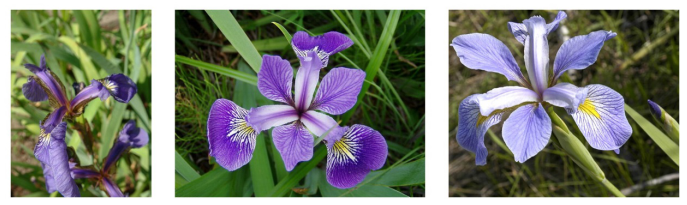

### 1. 准备数据
Iris的数据集与很多种获取方法，这里我们可以使用sklearn的中的模块导入Iris数据集。当然，使用前需要提前安sklearn。数据集中的数据是以key-value对应存放的。
#### 代码1-1：导入数据集

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
data

In [ ]:
data.keys()  #查看数据集的结构

- **data**：data里面是花萼长度、花萼宽度、花瓣长度、花瓣宽度的测量数据，格式为NumPy数组。 data数组的每一行对应一朵花，列代表每朵花的四个测量数据。
- **target:**对应每条数据对应的类别,可以看到类别是已经被映射到0-2的数字。
- **target_names：**对应的是一个字符串数组，里面包含我们需要预测的花的品种。
- **DESCR:**对应的值是数据集的简要说明。
- **feature_names：**对应的值是一个字符串列表，对每一个特征进行了说明

我们主要想使用Iris的特征，做分类任务。数据包含在target和data字段中。：所以这里我们只要data和target中的值。

In [ ]:
data['data'][:5]  #数据较长，只打印前5个，查看效果

In [ ]:
data['target']

#### 代码1-2：获取其中的data和target

In [ ]:
iris_target = data.target
iris_data = np.float32(data.data)  #将np.array转化为float类型的list
print(iris_target[:5],'\n',iris_data[:5])  #打印前5条数据，查看结果

### 2. 数据处理
原始的数据集标签为0、1、2三类，我们这里将它转化为one hot标签。
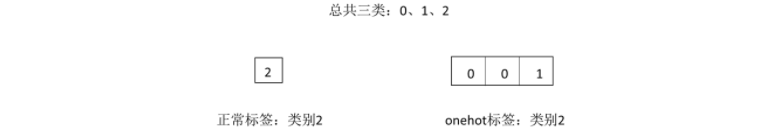
#### 【测试】测测，你对one hot编码了不了解？
[0,1,0,0,0,0]的真实标签是多少？分类的类别是多少？[0,1,0,0,0,1,0]这是one hot标签么？[0.2,0.1,0.5,0.2]这是one hot标签么？

#### <font color=green>【扩充】：为什么使用one hot标签？</font>
其实标签不一定必须用one hot，不过用one hot时，主要因素包括：
- **one hot的形式无法比较大小。**如果你预测的label是苹果，雪梨，香蕉，草莓这四个，显然他们不直接构成比较关系，但如果我们用1,2,3,4来做label就会出现了比较关系，labe之间的距离也不同。有了比较关系，第一个label 和最后一个 label的距离太远，影响模型的学习。因为模型觉得label 1和label 2最像，和最后一个label 最不像。不过当你的label之间存在直接的比较关系，就可以直接用数字当label。例如你做一个风控模型，预测的是四个风险类别[低，中，高，紧急]，其实你也可以用1，2，3，4来做label，因为确实存在一个比较。但这本质上就成了回归问题。
- **one hot的形式还可以计算top N准确度。**预测的结果将会是[0.1, 0.6, 0.2, 0.1]这样的形式，我们一般取概率最高的那个为预测结果，假设这四个label还是[苹果，雪梨，香蕉，草莓]，如果真实的结果是雪梨，那么这个结果是top1 准确的。但如果实际结果是香蕉，但香蕉的概率排第二，那么这个结果也是top 2准确的。top N准确率在推荐类应用中很常用，你购物时经常会看到物品下方有N个推荐搭配，如果推荐模型的top N准确率越高，那么这个购物推荐的最后转化效果就越好。所以我们在**分类**的时候常会使用**交叉熵作为损失函数**，使用**one hot作为标签编码方式**。

In [ ]:
data.target

one hot的具体实现，可以采用tf.keras自带的工具<font color=green>**tf.keras.utils.to_categorical**</font>进行处理。

#### 代码1-3：将标签转化为one hot编码

In [ ]:
iris_target = np.float32(tf.keras.utils.to_categorical(iris_target,num_classes=3))
iris_target

#### <font color=green>【扩充】one hot编码的实现方式</font>

####  Keras风格的编码方式:**tf.keras.utils.to_categorical**

tf.keras.utils.to_categorical((y, num_classes=None, dtype=‘float32’))，这种方式实现的one hot编码输出的是<font color=green>**数组**</font>。
#### A、不指定类别数，以给出的最大标签作为数据集中的最大标签

In [ ]:
import tensorflow as tf
one_hot_k1=tf.keras.utils.to_categorical([1,2])
one_hot_k2=tf.keras.utils.to_categorical([[1],[3]])
print(one_hot_k1,'\n',one_hot_k2)

#### B、直接指定类别数

In [ ]:
one_hot_k3=tf.keras.utils.to_categorical([1,3],num_classes=5)
print(type(one_hot_k3))
print(one_hot_k3)

#### 代码1-4-4:批量加载数据集

In [ ]:
iris_data = tf.data.Dataset.from_tensor_slices(iris_data).batch(50)
iris_target = tf.data.Dataset.from_tensor_slices(iris_target).batch(50)

### 3、完整代码

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
iris_data = np.float32(data.data)
iris_target = data.target
iris_target = tf.keras.utils.to_categorical(iris_target,num_classes=3)

train_data = tf.data.Dataset.from_tensor_slices((iris_data,iris_target)).batch(128)

In [ ]:
inputs = tf.keras.layers.Input(shape=(4))
x = tf.keras.layers.Dense(32,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(3,activation='softmax')(x)
model = tf.keras.Model(inputs = inputs,outputs = outputs)

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(lr=1e-3),loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(train_data,epochs=500)
score = model.evaluate(iris_data,iris_target)
print("last score:",score)